In [ ]:
- Draw a dendogram if possible

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [3]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances


#Birch does not scale well in high dimensions
#n_clusters=n_clusters,

In [5]:
n_clusters = 10

## Parameter Grid Search 

In [9]:
branching_factors = [10, 20, 30, 40, 50 ,60, 70, 80, 90, 100]
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
#min_df_vals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [10]:
def grid_search(logs, labels_, gram, min_df):
    
    result_header = ["Branching Factor", "Threshold", "VMeasure", "Fowlkes-Mallows"]
    results = []
    
    X = get_features(logs, gram, min_df)
    X = X.toarray()

    idxs = np.where(np.all(X == 0, axis=1))

    X = np.delete(X, idxs, axis=0)
    labels_ = np.delete(labels_, idxs)
        
    for bf in branching_factors:
        for thres in thresholds: 
            model = Birch(n_clusters=n_clusters, branching_factor=bf, threshold=thres, compute_labels=True)
            model.fit(X)

            labels = model.labels_

            vm = evaluate_vmeasure(labels_, labels)
            fm = evaluate_fm(labels_, labels)

            result = [bf, thres, vm, fm]
            results.append(result)

            tab_results(result_header, results) 
                
    tab_results(result_header, results)   

In [11]:
grid_search(logs, log_labels, 2, 70)

+------------------+-----------+-------------------+--------------------+
| Branching Factor | Threshold |      VMeasure     |  Fowlkes-Mallows   |
+------------------+-----------+-------------------+--------------------+
|        10        |    0.1    | 0.832731457504197 | 0.6936821164905731 |
+------------------+-----------+-------------------+--------------------+
+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
+------------------+-----------+--------------------+--------------------+
+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+----------

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.832731457504197  | 0.6936821164905731 |
|        10        |    0.2    | 0.8172095199113324 | 0.6861312441125508 |
|        10        |    0.3    | 0.792894707808992  | 0.6565745262926099 |
|        10        |    0.4    | 0.8371701747166099 | 0.7600177157019385 |
|        10        |    0.5    | 0.8609944507204433 | 0.7864477157488777 |
|        20        |    0.1    | 0.780090110390159  | 0.6472169300865501 |
|        20        |    0.2    | 0.8341620043580218 | 0.7168164399613393 |
|        20        |    0.3    | 0.818191599860224  | 0.6867024545482072 |
|        20        |    0.4    | 0.8387567479868536 | 0.7011826995082169 |
|        20        |    0.5    | 0.8870388444363798 | 0.7708573693741553 |
|        30        |    0

In [12]:
grid_search(logs, log_labels, 3, 90)

+------------------+-----------+-------------------+--------------------+
| Branching Factor | Threshold |      VMeasure     |  Fowlkes-Mallows   |
+------------------+-----------+-------------------+--------------------+
|        10        |    0.1    | 0.713837376052892 | 0.5597986373677171 |
+------------------+-----------+-------------------+--------------------+
+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.713837376052892  | 0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 | 0.5701192982695313 |
+------------------+-----------+--------------------+--------------------+
+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+----------

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

+------------------+-----------+--------------------+---------------------+
| Branching Factor | Threshold |      VMeasure      |   Fowlkes-Mallows   |
+------------------+-----------+--------------------+---------------------+
|        10        |    0.1    | 0.713837376052892  |  0.5597986373677171 |
|        10        |    0.2    | 0.7362335478588914 |  0.5701192982695313 |
|        10        |    0.3    | 0.7672461676930102 |  0.6108182370985021 |
|        10        |    0.4    | 0.7481325578715655 |  0.572465810495502  |
|        10        |    0.5    | 0.7751672052534929 |  0.6474401773506326 |
|        20        |    0.1    |  0.74375713265279  |  0.5727524221107839 |
|        20        |    0.2    | 0.7201444459054701 |  0.5639465764731039 |
|        20        |    0.3    | 0.8072321658489321 |  0.6828527637673514 |
|        20        |    0.4    | 0.7429346840442963 |  0.5686211735409493 |
|        20        |    0.5    | 0.7653075974507763 |  0.626677419631297  |
|        30 

## Bigram Feature Vectorizer

In [13]:
eval_results = []

In [14]:
labels_ = log_labels
            
X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [15]:
model = Birch(n_clusters=n_clusters, branching_factor=70, threshold=0.5, compute_labels=True)
Y = model.fit_transform(X)

In [16]:
Y.shape

(27093, 241)

In [17]:
results = evaluate_clustering('Birch Bigram Clustering', X, labels_, model.labels_)
print(results)

['Birch Bigram Clustering', '0.87', '0.91', '0.89', '0.80', '0.89', '0.83']


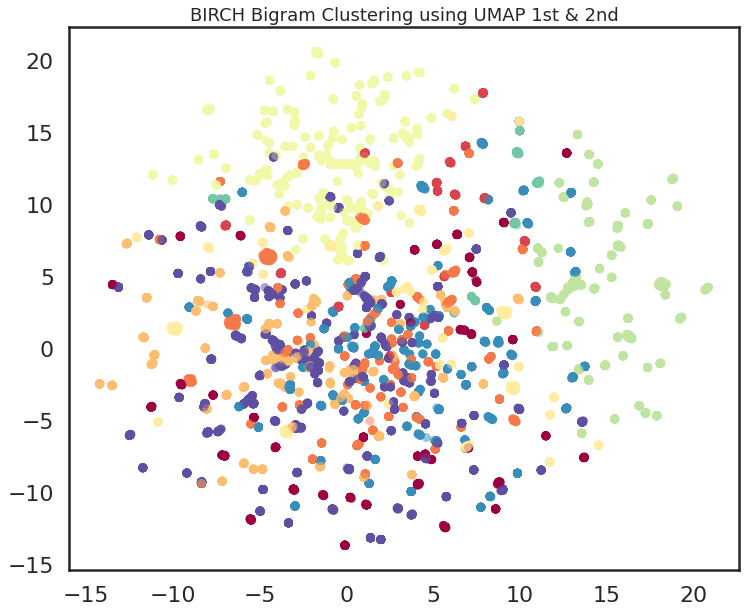

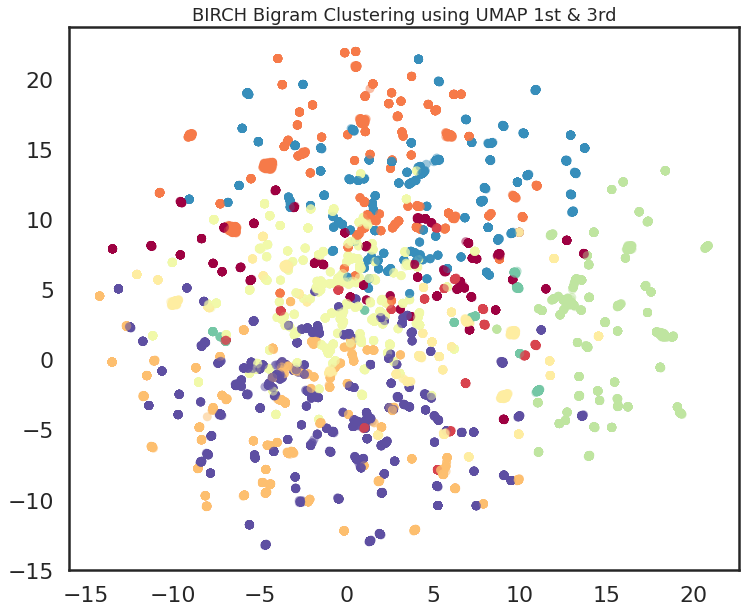

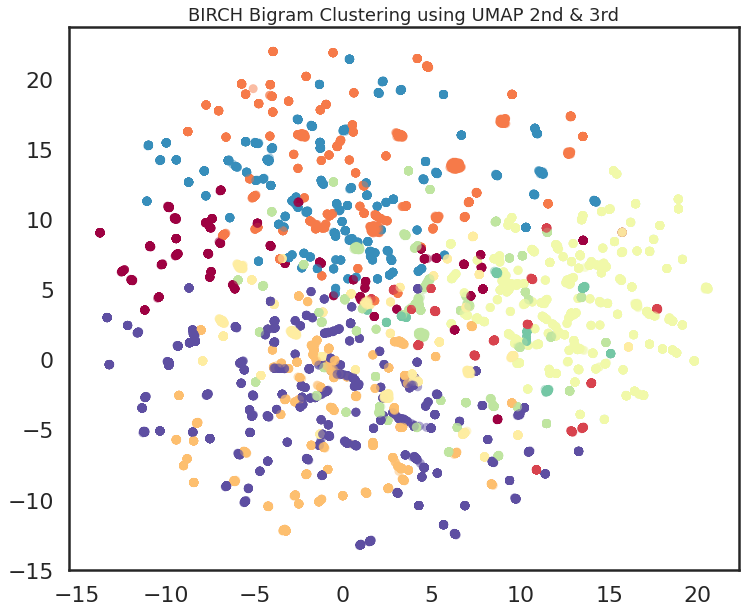

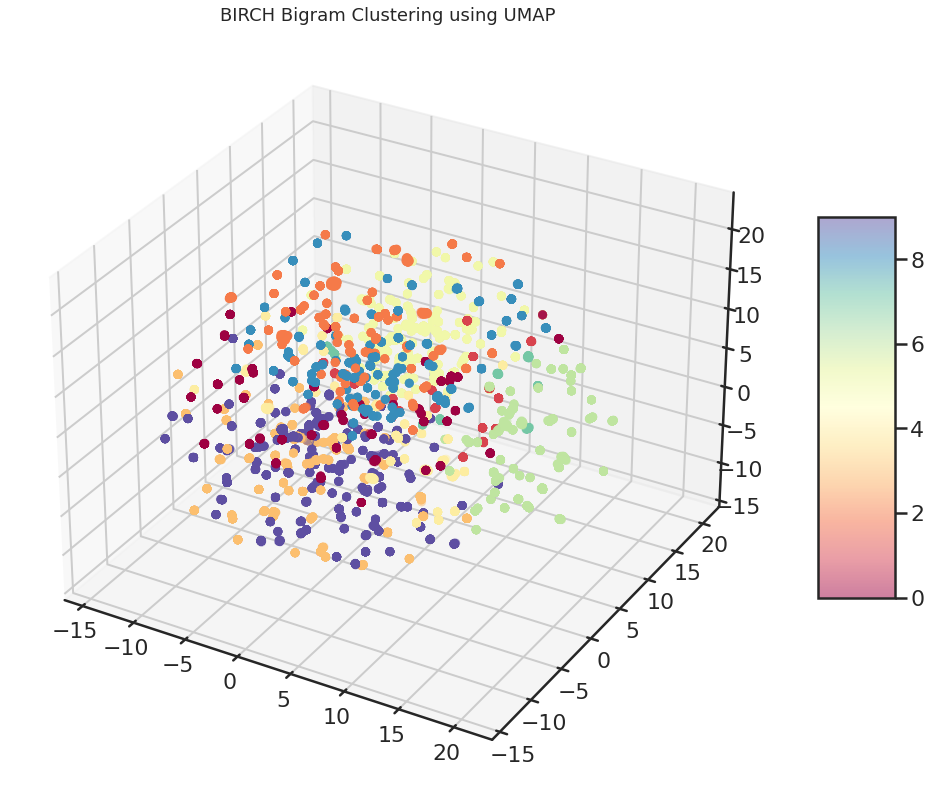

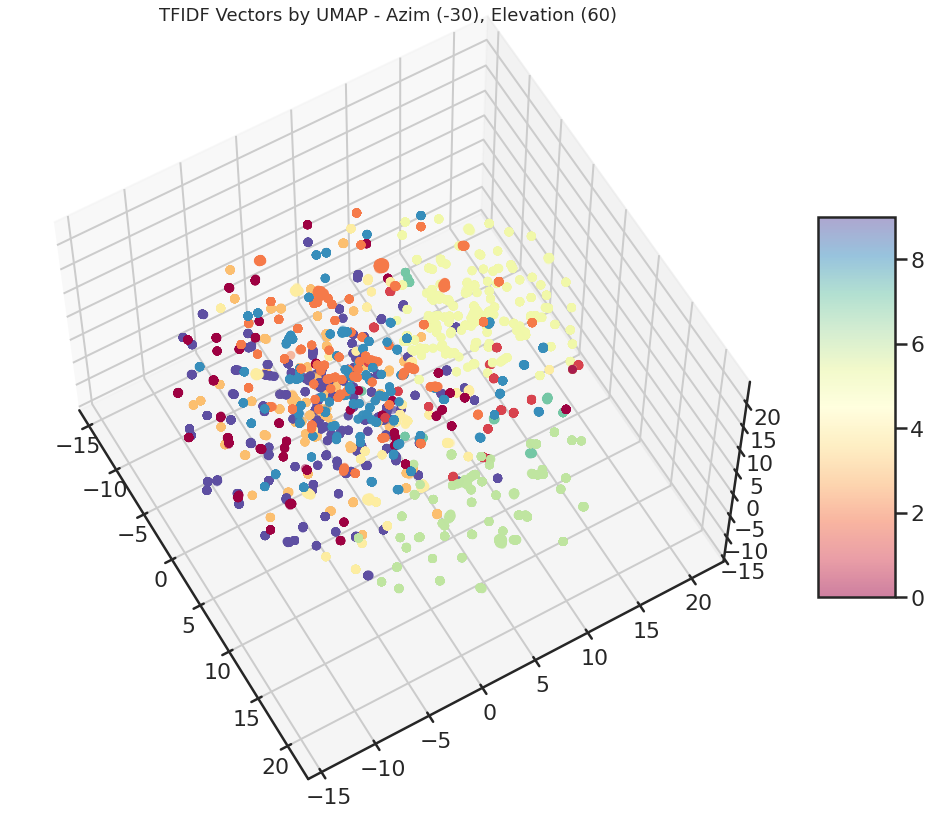

In [18]:
plot_clusters("BIRCH Bigram Clustering using UMAP", X, model.labels_)

In [ ]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [23]:
labels_ = log_labels
            
X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [24]:
model = Birch(n_clusters=n_clusters, branching_factor=100, threshold=0.5, compute_labels=True)
Y = model.fit_transform(X)

In [25]:
Y.shape

(27029, 265)

In [26]:
results = evaluate_clustering('Birch Trigram Clustering', X, labels_, model.labels_)
print(results)

['Birch Trigram Clustering', '0.86', '0.90', '0.88', '0.79', '0.88', '0.81']


/home/nk/miniconda3/envs/project/lib/python3.9/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/nk/miniconda3/envs/project/lib/python3.9/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


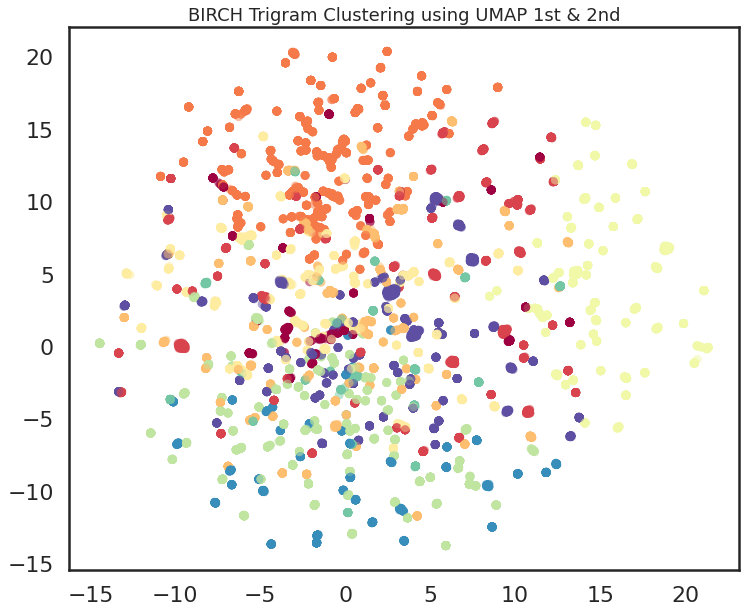

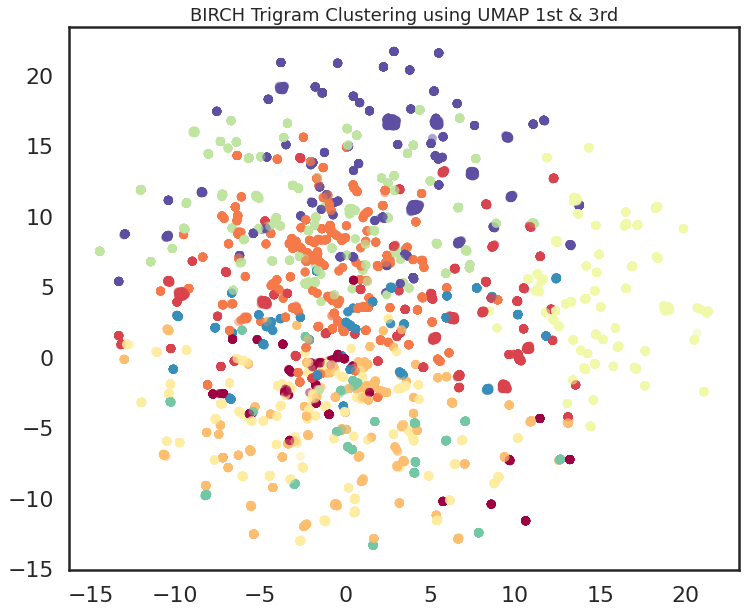

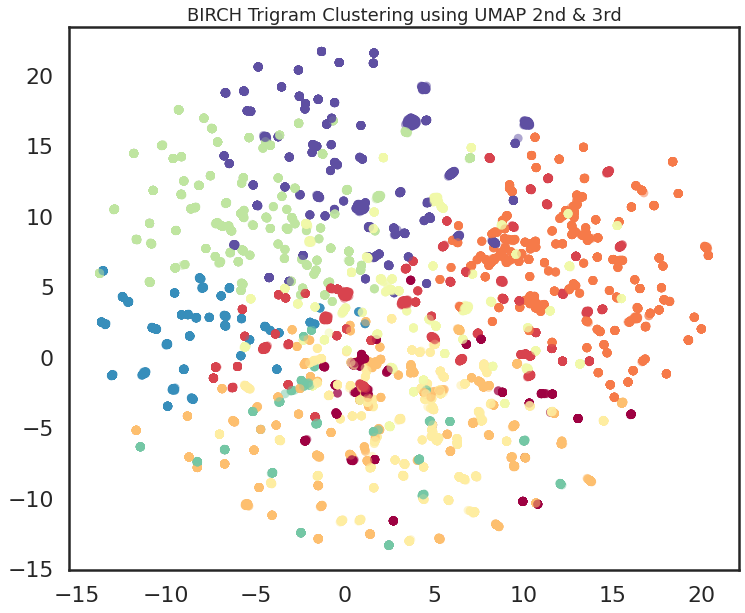

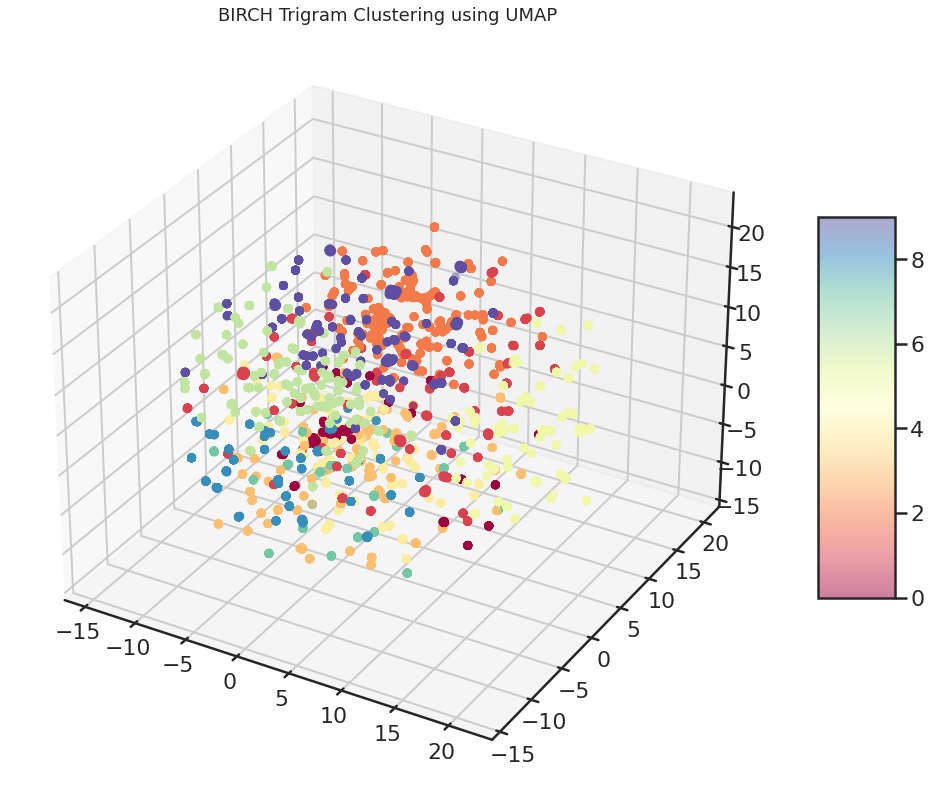

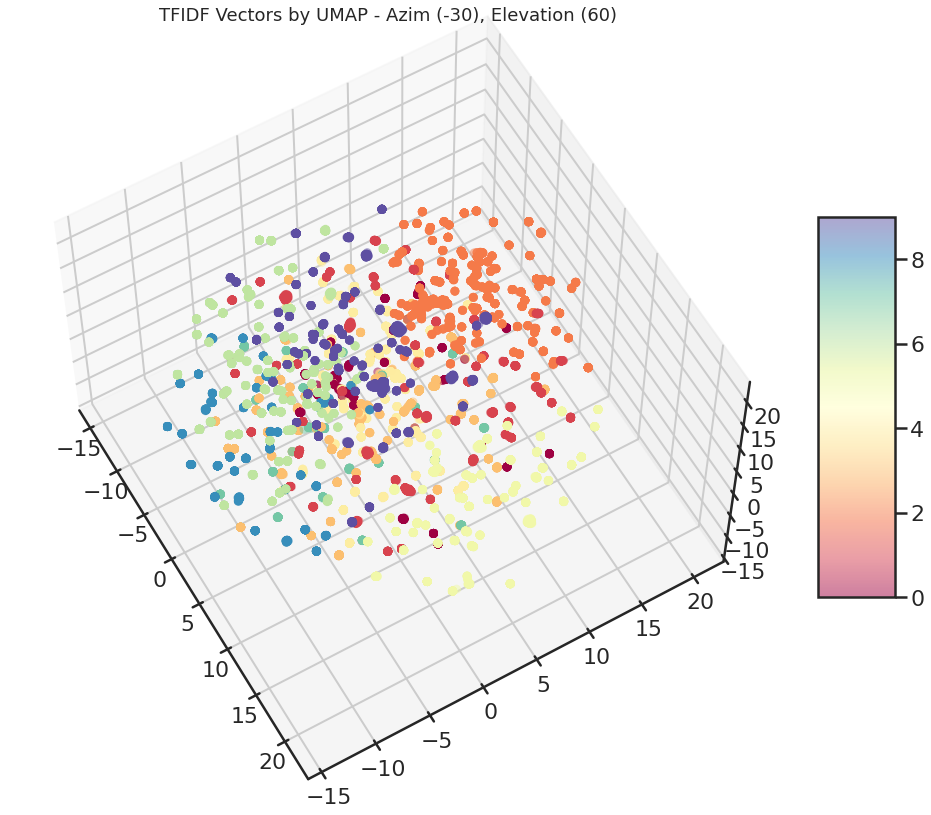

In [27]:
plot_clusters("BIRCH Trigram Clustering using UMAP", X, model.labels_)

In [30]:
eval_results.append(results)